In [1]:
from bs4 import BeautifulSoup
import requests
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#URL = "https://www.azlyrics.com/lyrics/wutangclan/bringdaruckus.html"

In [3]:
#URL = "https://www.azlyrics.com/lyrics/vampireweekend/oxfordcomma.html"

In [4]:
#URL = "https://www.azlyrics.com/lyrics/ledzeppelin/stairwaytoheaven.html"

In [5]:
#URL = "https://www.azlyrics.com/lyrics/michaeljackson/thriller.html"

In [6]:
URL = "https://www.azlyrics.com/lyrics/prodigy/smackmybitchup.html"

In [7]:
#URL = "https://www.azlyrics.com/lyrics/jayz/99problems.html"

In [8]:
html = requests.get(URL).text

In [9]:
soup = BeautifulSoup(html, "html5lib")

In [10]:
head = soup.find('head')
body = soup.find('body')

In [11]:
artist_regex = re.compile(r'(ArtistName = ")(.*)(";)')
songname_regex = re.compile(r'(SongName = ")(.*)(";)') 

In [12]:
artist = re.search(artist_regex, head.get_text())[2]
songname = re.search(songname_regex, head.get_text())[2]

In [13]:
lyrics = body.find_all('div')[20].get_text()
print(lyrics)



Change my pitch up, smack my bitch up
Change my pitch up, smack my bitch up
Change my pitch up, smack my bitch up
Change my pitch up, smack my bitch up

Smack my bitch up

Smack my bitch up

Change my pitch up, smack my bitch up
Change my pitch up, smack my bitch up



In [14]:
lol = [x for x in lyrics.split('\n') if (not x.startswith('[') and (len(x)>0))]

In [15]:
words = []

for blah in lol:
    for x in blah.split(' '):
        if '...' in x:
            x = x.split('...')[0]
        if '!' in x:
            x = x.split('!')[0]
        if 'nigga' in x:
            break
        words.append(x)
        
wordset = set(words)

In [16]:
len(wordset)

8

In [17]:
lyrics_cleaned = ''
for x in words:
    lyrics_cleaned += x
    lyrics_cleaned += ' '

In [18]:
lyrics_cleaned

'Change my pitch up, smack my bitch up Change my pitch up, smack my bitch up Change my pitch up, smack my bitch up Change my pitch up, smack my bitch up Smack my bitch up Smack my bitch up Change my pitch up, smack my bitch up Change my pitch up, smack my bitch up '

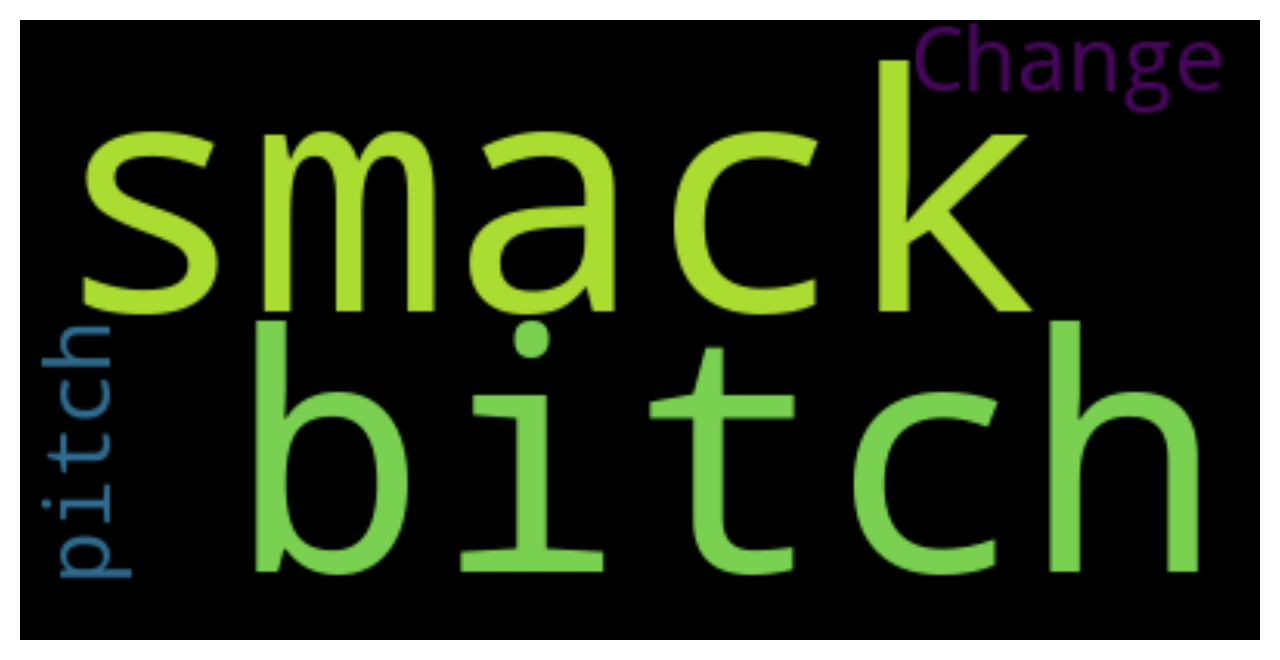

In [19]:
wordcloud = WordCloud().generate(lyrics_cleaned)

fig,ax = plt.subplots(1, 1, figsize=(8,5), dpi=200)

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off');